## 연습문제

### Data Science 분야에 대한 관심도 조사 결과를 시각화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_survey = pd.read_csv('Topic_Survey_Assignment.csv', index_col=0)
df_survey

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


### 1 단계 - 관심도 높은 순서로 정렬

In [3]:
df_survey.sort_values('Very interested', ascending=False, inplace=True)
df_survey

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


### 2 단계 - 응답한 숫자를 전체 응답 숫자에 대한 비율로 전환

In [4]:
row_sum = df_survey.sum(axis=1)
row_sum

Data Analysis / Statistics    2192
Machine Learning              2180
Data Visualization            2176
Big Data (Spark / Hadoop)     2188
Deep Learning                 2169
Data Journalism               2120
dtype: int64

In [5]:
df_survey = round(df_survey.divide(row_sum, axis=0) * 100, 2)
df_survey

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,77.01,20.26,2.74
Machine Learning,74.72,21.88,3.39
Data Visualization,61.58,33.73,4.69
Big Data (Spark / Hadoop),60.88,33.32,5.80
Deep Learning,58.23,35.50,6.27
Data Journalism,20.24,50.99,28.77


### 3 단계 - 조사 분야별로 bar chart 작성하여 비교

In [6]:
categories = df_survey.index
categories

Index(['Data Analysis / Statistics', 'Machine Learning', 'Data Visualization',
       'Big Data (Spark / Hadoop)', 'Deep Learning', 'Data Journalism'],
      dtype='object')

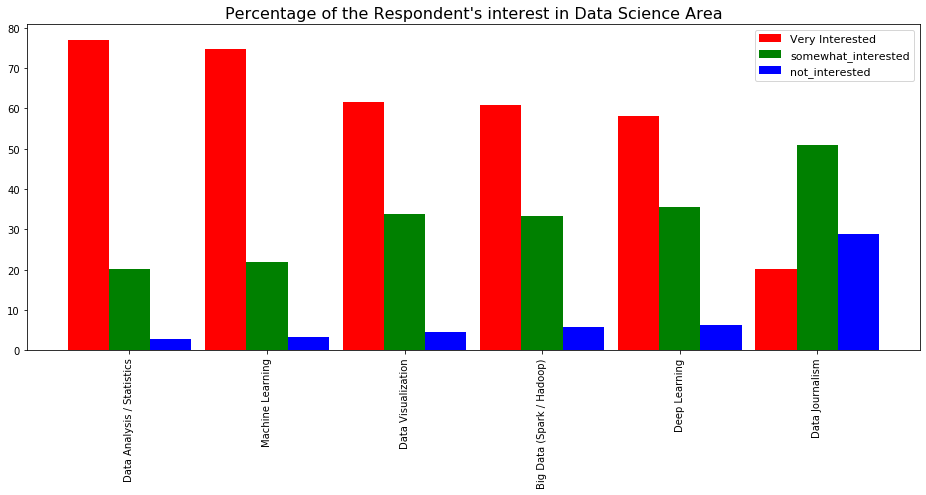

In [16]:
fig, ax = plt.subplots(figsize=(16, 6))

index = np.arange(len(df_survey))

very_interested = df_survey.iloc[:, 0].values
somewhat_interested = df_survey.iloc[:, 1].values
not_interested = df_survey.iloc[:, 2].values

ax.bar(index, very_interested, width=0.3, color='red', label="Very Interested")
ax.bar(index+0.3, somewhat_interested, width=0.3, color='green', tick_label=categories, label="somewhat_interested")
ax.bar(index+0.6, not_interested , width=0.3, color='blue', label="not_interested ")

ax.set_title("Percentage of the Respondent's interest in Data Science Area", fontsize=16)
ax.set_xticklabels(categories, rotation=90)

plt.legend(fontsize=11)